## Histograms and PDFs

*"I'm having trouble getting the pdf to scale to the distribution. My pdf maxes out a 2 while my histogram goes to 500."*

Think about it this way:

  * Your histogram shows how many samples fell into each bin. That is what the height of each bin is. E.g., if you have a 10,000 samples, then the sum of the heights of the bins in your histogram has to be 10,000.

  Your PDF, though, speaks of the probability density of finding ***a single object***. So the first thing to do is to normalize the histogram -- divide it by the total number of samples (10,000). Now the height of each bin in such a normalized histogram will be ***the probability that a single sample fell into that bin.***


  * We're not done yet! While the values in your normalized histogram now describe the probability a single sample fell into that bin, what the PDF describes is the probability **density** (see [this notebook](https://github.com/uw-astr-324/astr-324-s20/blob/master/lectures/notes-Why-can-a-PDF-value-be-greater-than-1.ipynb) for more).

  You now need to either convert the density from the PDF into probability, or the probability from the histogram into density; the latter is easier and more common. If the height of a bin in your normalized histogram is $h$, and the width of the bin is $dx$, then the probability density will be $h/dx$. In other words, we need to further divide the height of each bin in our normalized histogram by $dx$, the bin width.

A demonstration of all this:

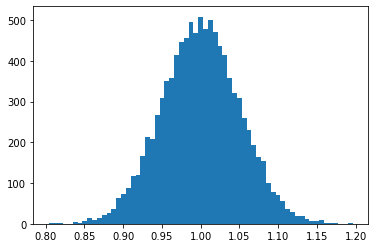

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

N = 10_000

np.random.seed(42)
g = norm(1, 0.05)
p = g.pdf

x = g.rvs(N)
plt.hist(x, bins='fd');

Now let's do the divisions we talked about above:

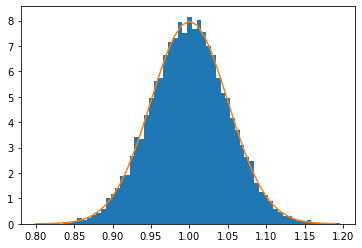

In [2]:
# create the histogram w/o plotting it.
# np.histogram returns the heights of each bin, and the coordinates of bin edges.
h, bin_edges = np.histogram(x, bins='fd')

# let's figure out the bin width
dx = bin_edges[1] - bin_edges[0]

# and now convert the histogram counts to probability density...
h = h / (dx*N)

# then plot the normalized histogram ...
plt.hist(bin_edges[:-1], bin_edges, weights=h);

# ... and overplot the PDF
xx = np.arange(0.8, 1.2, 0.01)
plt.plot(xx, p(xx))

Voilà!

Since this (comparing histograms to PDFs) is such a common thing to do, matplotlib provides us with a useful `density=True` argument we can pass to `plt.hist` to get all of this done in one go:

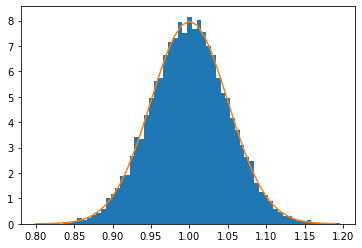

In [3]:
plt.hist(x, bins='fd', density=True)

xx = np.arange(0.8, 1.2, 0.01)
plt.plot(xx, p(xx))

Q.E.D.